In [100]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import scipy.stats as scipy
sys.path.append("..\\backtesting")
import dynamic_backtesting as db
plt.style.use('seaborn')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=["grey", "green", "black", "deepskyblue", "orange", "lime", "purple", "Gold", "brown", "blue", "pink"]) 

In [2]:
assets = {"EEM": "Emerging Markets",
           "IVV": "S&P 500",
           "IEV": "MSCI Europe",
           "IXN": "Global Tech",
           "IYR": "US Real Estate",
           "IXG": "Global Financials",
           "EXI": "Global Industrials",
           "GC=F": "Gold Futures", 
           "BZ=F": "Brent Crude Oil Futures",
           "HYG": "High-Yield Corporate Bonds",
           "TLT": "20+ Year Treasury Bonds"}
tickers = list(assets.keys())
asset_names = list(assets.values())
#spx = pd.read_csv('../data/spx.csv').stack().tolist()

**Henter return data udfra tickers**

In [173]:
return_data =db.download_return_data(tickers, save_to_csv=False)
#cov = return_data.cov()

[*********************100%***********************]  11 of 11 completed
                BZ=F       EEM       EXI      GC=F       HYG       IEV  \
Date                                                                     
2008-01-02  4.251463 -1.650019 -0.473783  2.647021 -1.211286 -0.271136   
2008-01-03 -0.245296  0.899744 -0.142801  1.096852 -0.190921  0.175392   
2008-01-04 -0.829916 -3.003688 -2.971562 -0.380892 -0.110781 -2.346105   
2008-01-07 -2.479597  0.732688 -0.982662 -0.405515 -0.594832  0.501988   
2008-01-08  1.218351 -0.775377 -0.744280  2.140533 -0.577962 -0.909830   
...              ...       ...       ...       ...       ...       ...   
2021-09-27  1.844029  0.649866 -0.131962  0.017149 -0.091001 -0.148785   
2021-09-28 -0.553253 -1.291332 -1.767280 -0.811426 -0.455429 -2.197803   
2021-09-29 -0.568968 -0.931618 -0.067250 -0.823830  0.183001 -0.228526   
2021-09-30 -0.152598  0.800323 -1.152522  1.963407 -0.114169 -0.515366   
2021-10-01  0.967909 -0.099244  0.740428 

**Henter parametre**

In [197]:
coef, residuals, sigmas = db.fit_garch_model(3463)
mu, o, al, be, ka, shape, dcca, dccb, joint_shape = db.parse_garch_coef(coef, 11, "sGARCH11")

**Laver data til IRF plot**

In [202]:
t=1000
mu_T=mu.transpose()
irf_data=pd.DataFrame(mu_T.repeat(t,axis=0),columns=asset_names)
#Indsætter chok
irf_data.iloc[int(t/2),1]=8

**Calculate $\Omega_t$**

In [203]:
irf_omega_s=db.calc_Omega_ts(irf_data,sigmas,residuals, dcca, dccb, o, al, be, mu, ka)

**Calculate weight, $v_t$**

In [204]:
irf_weights=db.calc_weights_garch_no_trading_cost(irf_omega_s)

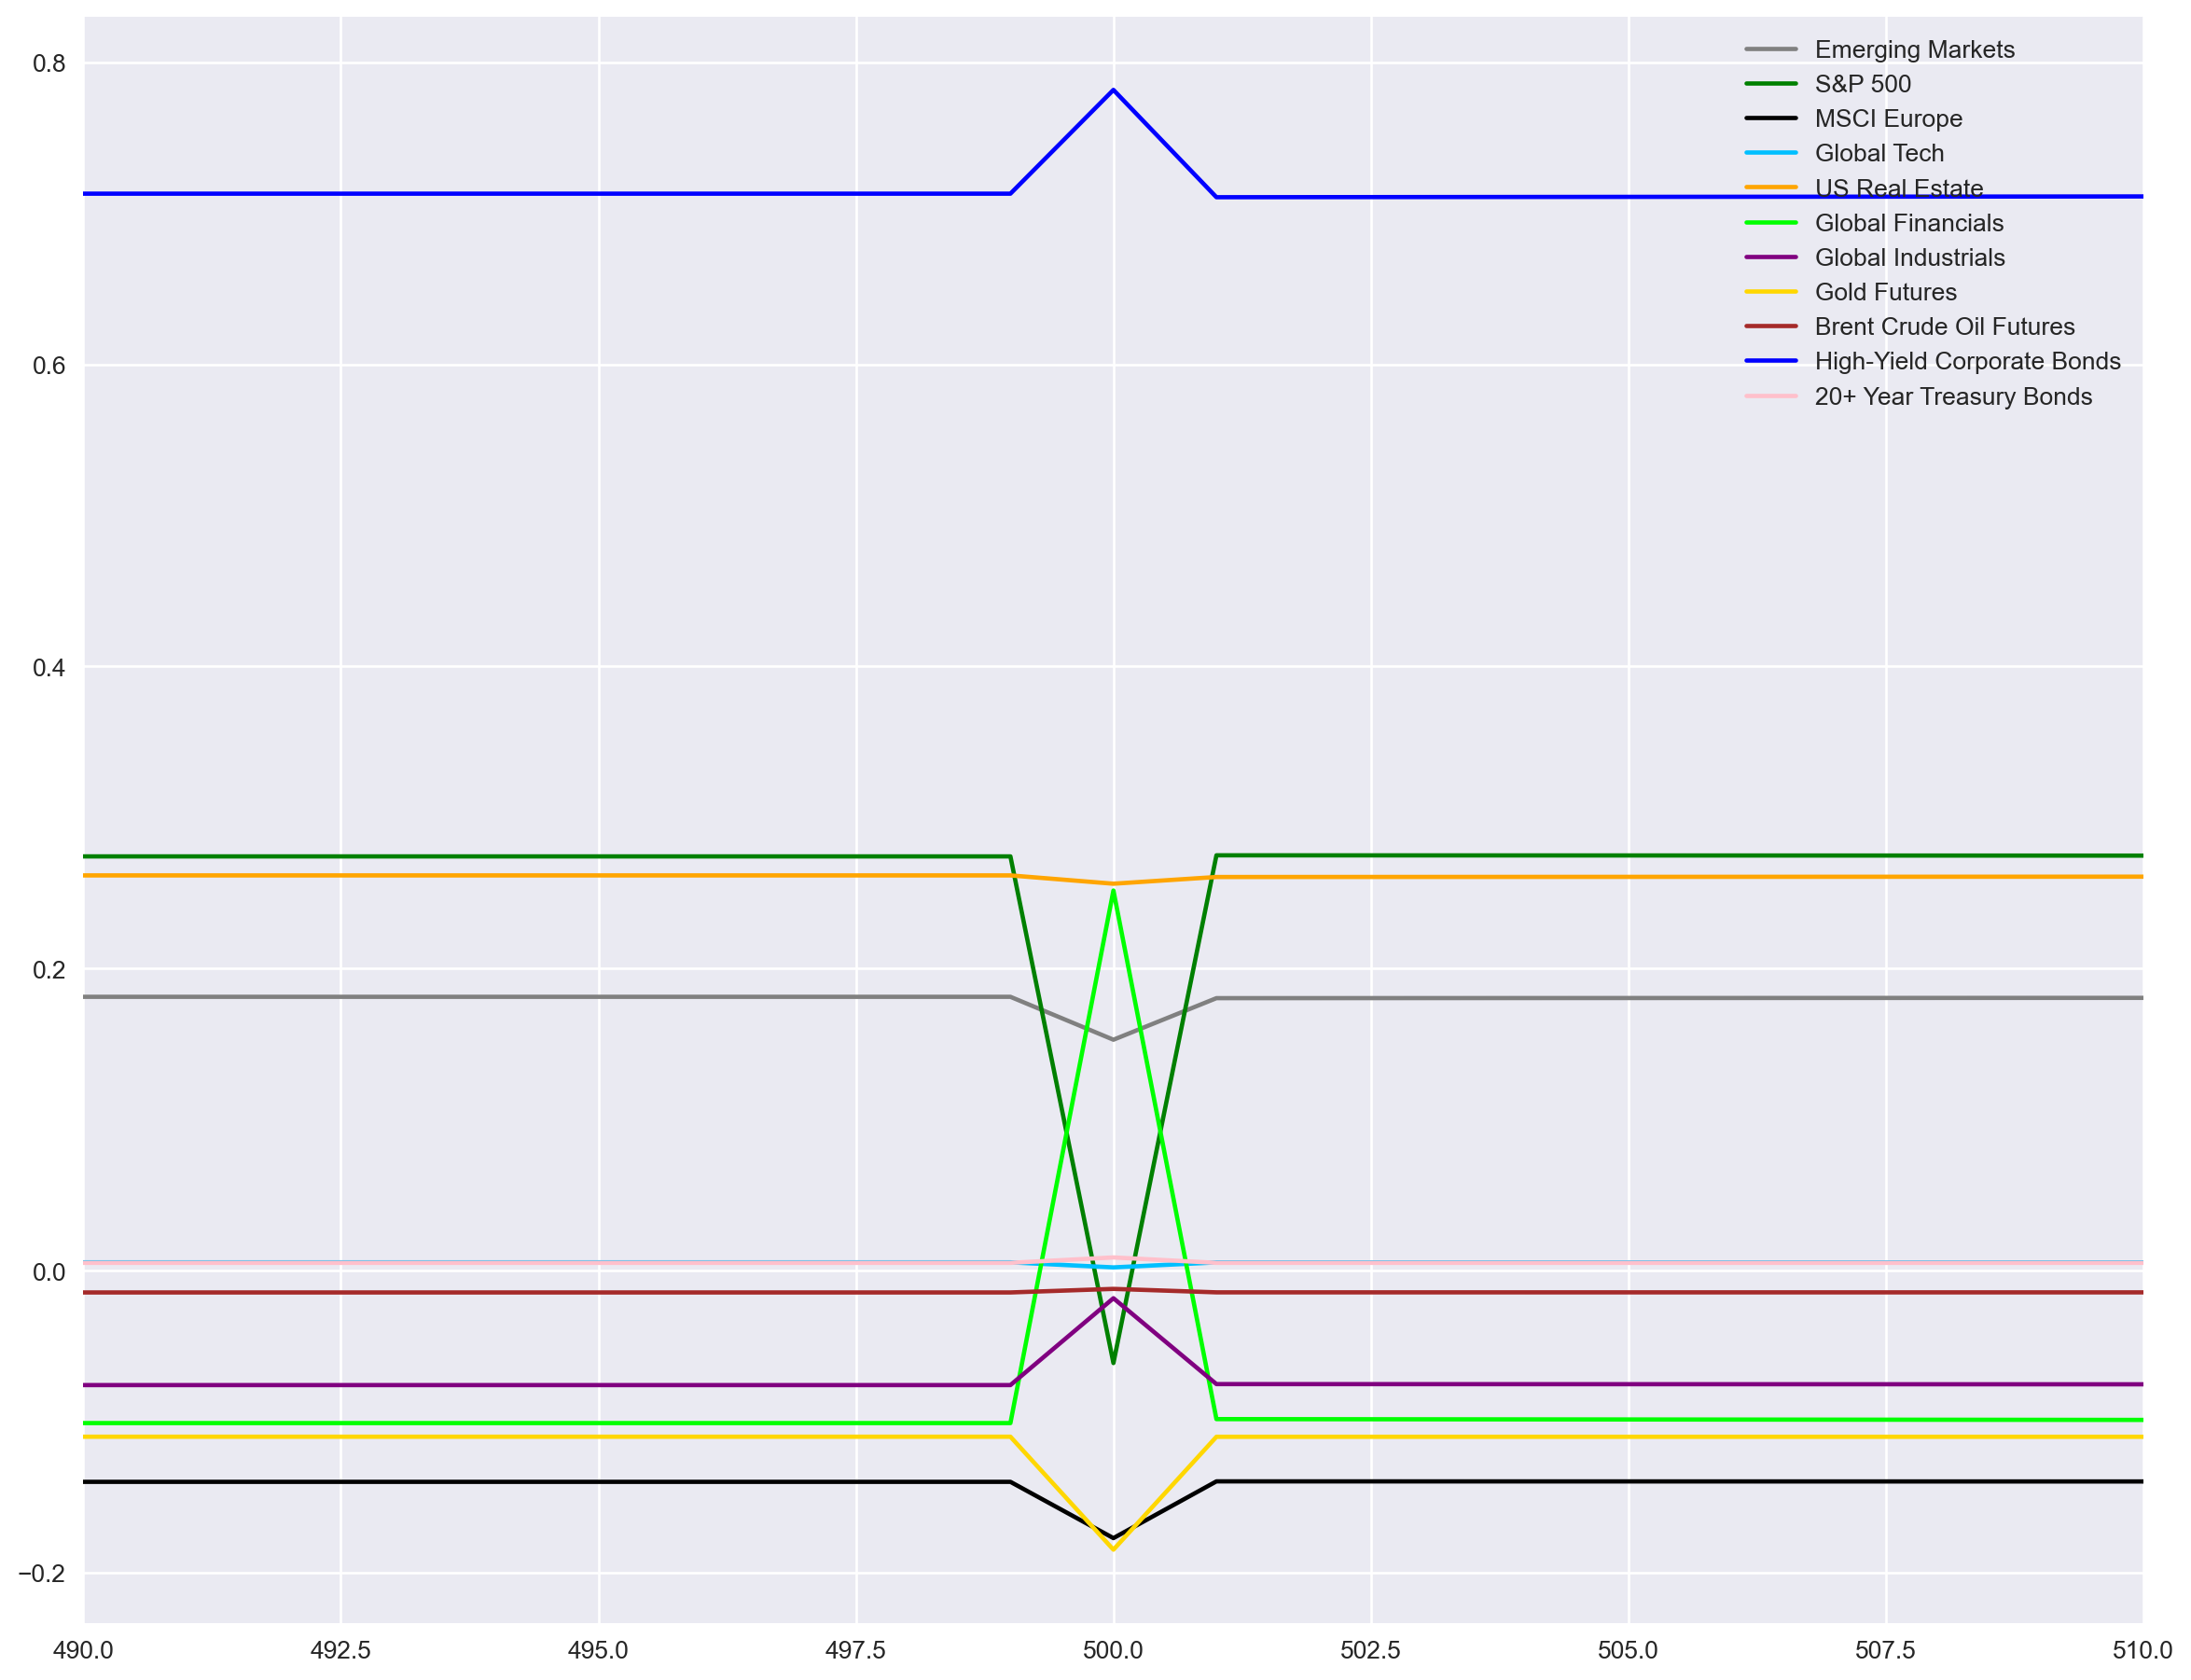

In [205]:
spread=10
#plt.style.use('seaborn')
fig, ax = plt.subplots(1, 1, figsize=(15,12), dpi=190)
ax.plot(irf_weights)
ax.set_xlim(int(t/2-spread),int(t/2+spread))
ax.legend(asset_names, loc='upper right')
#ax.set_xlabel('Returns') 
#ax.set_ylabel('Probability Density',loc='top', rotation = 0, labelpad = -110) 

In [210]:
print(o)

[[0.04154111]
 [0.03810971]
 [0.01827053]
 [0.00556953]
 [0.00346825]
 [0.0211807 ]
 [0.02046866]
 [0.02667602]
 [0.02895063]
 [0.0169206 ]
 [0.01517047]]
